# Mechanical Part of Speech Tagging for the Latin Language
## Digital Humanities: Practice & Theory
## Fergus J. P. Walsh

## Companion Jupyter Notebook

### Text preparation and tagset conversion

Functions to convert the Universal Dependencies tagset to Perseus-style tags. Note how some tags must be assigned by lemma; Perseus classes "nam", "enim", "donec" etc. as conjunctions, but in the LLCT, for example, they are adverbs.

In [ ]:
import re
def LLCTtoPerseus(LLCTtag, LLCTlemma):
    noun = re.search("NOUN|PROPN", LLCTtag)
    verb = re.search("VERB|AUX", LLCTtag)
    adjective = re.search("ADJ|DET|unus|duo", LLCTtag)
    adverb = re.search("ADV|PART|non", LLCTtag)
    conjunction = re.search("SCONJ|CCONJ|nam|enim|donec|ac|quoque|igitur", LLCTtag)
    adposition = re.search("ADP", LLCTtag)
    pronoun = re.search("PRON|qui|quidam|hic|iste|ipse", LLCTtag)
    numeral = re.search("NUM", LLCTtag)
    interjection = re.search("INTJ", LLCTtag)
    punctuation = re.search("PUNCT", LLCTtag)
    if noun:
        pos = "n"
    elif verb:
        pos = "v"
    elif adjective:
        pos = "a"
    elif adverb:
        pos = "d"
    elif conjunction:
        pos = "c"
    elif adposition:
        pos = "r"
    elif pronoun:
        pos = "p"
    elif numeral:
        pos = "m"
    elif interjection:
        pos = "i"
    elif punctuation:
        pos = "u"
    else:
        pos = "e"
    
    first = re.search("'Person': '1'", LLCTtag)
    second = re.search("'Person': '2'", LLCTtag)
    third = re.search("'Person': '3'", LLCTtag)
    if first:
        person = "1"
    elif second:
        person = "2"
    elif third:
        person = "3"
    else:
        person = "-"
        
    sing = re.search("'Number': 'Sing'", LLCTtag)
    plur = re.search("'Number': 'Plur'", LLCTtag)
    if sing:
        number = "s"
    elif plur:
        number = "p"
    else:
        number = "-"
        
    present = re.search("'Tense': 'Pres'", LLCTtag)
    imperfect = re.search("'Aspect': 'Imp'.*('Tense': 'Past')", LLCTtag)
    perfect = re.search("'Aspect': 'Perf'.*('Tense': 'Past')", LLCTtag)
    pluperfect = re.search("'Tense': 'Pqp'", LLCTtag)
    futureperfect = re.search("'Aspect': 'Perf'.*('Tense': 'Fut')", LLCTtag)
    future = re.search("'Tense': 'Fut'", LLCTtag)
    if present:
        tense = "p"
    elif imperfect:
        tense = "i"
    elif perfect:
        tense = "r"
    elif pluperfect:
        tense = "l"
    elif futureperfect:
        tense = "t"
    elif future:
        tense = "f"
    else:
        tense = "-"
    
    indicative = re.search("'Mood': 'Ind'", LLCTtag)
    subjunctive = re.search("'Mood': 'Sub'", LLCTtag)
    infinitive = re.search("'VerbForm': 'Inf'", LLCTtag)
    imperative = re.search("'Mood': 'Imp'", LLCTtag)
    participle = re.search("'VerbForm': 'Part'", LLCTtag)
    gerund = re.search("'VerbForm': 'Ger'", LLCTtag)
    gerundive = re.search("'VerbForm': 'Gdv'", LLCTtag)
    if indicative:
        mood = "i"
    elif subjunctive:
        mood = "s"
    elif infinitive:
        mood = "n"
    elif imperative:
        mood = "m"
    elif imperative:
        mood = "m"
    elif participle:
        mood = "p"
    elif gerund:
        mood = "d"
    elif gerundive:
        mood = "g"
    else:
        mood = "-"
    
    active = re.search("'Voice': 'Act'", LLCTtag)
    deponent = LLCTlemma in deponent_list_iu
    passive = not deponent and re.search("'Voice': 'Pass'", LLCTtag)
    if active:
        voice = "a"
    elif passive:
        voice = "p"
    elif deponent:
        voice = "d"
    else:
        voice = "-"
    
    masculine = re.search("'Gender': 'Masc'", LLCTtag)
    feminine = re.search("'Gender': 'Fem'", LLCTtag)
    neuter = re.search("'Gender': 'Neut'", LLCTtag)
    if masculine:
        gender = "m"
    elif feminine:
        gender = "f"
    elif neuter:
        gender = "n"
    else:
        gender = "-"
        
    nominative = re.search("'Case': 'Nom'", LLCTtag)
    genitive = re.search("'Case': 'Gen'", LLCTtag)
    dative = re.search("'Case': 'Dat'", LLCTtag)
    accusative = re.search("'Case': 'Acc'", LLCTtag)
    vocative = re.search("'Case': 'Voc'", LLCTtag)
    ablative = re.search("'Case': 'Abl'", LLCTtag)
    locative = re.search("'Case': 'Loc'", LLCTtag)
    if nominative:
        case = "n"
    elif genitive:
        case = "g"
    elif dative:
        case = "d"
    elif accusative:
        case = "a"
    elif vocative:
        case = "v"
    elif ablative:
        case = "b"
    elif locative:
        case = "l"
    else:
        case = "-"
    
    positive = re.search("'Degree': 'Pos'", LLCTtag)
    comparative = re.search("'Degree': 'Cmp'", LLCTtag)
    superlative = re.search("'Degree': 'Sup'", LLCTtag)
    if comparative:
        degree = "c"
    elif superlative:
        degree = "s"
    elif positive:
        degree = "p"
    else:
        degree = "-"

    LLCT_new_tag = f"{pos}.{person}.{number}.{tense}.{mood}.{voice}.{gender}.{case}.{degree}"
    return LLCT_new_tag

def PROIELtoPerseus(PROIELtag, PROIELlemma):
    noun = re.search("NOUN|PROPN", PROIELtag)
    verb = re.search("VERB", PROIELtag)
    adjective = re.search("ADJ|DET|unus|duo", PROIELtag)
    adverb = re.search("ADV", PROIELtag)
    conjunction = re.search("SCONJ|CCONJ|nam|enim|donec|ac|quoque|igitur", PROIELtag)
    adposition = re.search("ADP", PROIELtag)
    pronoun = re.search("PRON|qui|quidam|hic|iste|ipse|ille", PROIELtag)
    numeral = re.search("NUM", PROIELtag)
    interjection = re.search("INTJ", PROIELtag)
    punctuation = re.search("PUNCT", PROIELtag)
    if noun:
        pos = "n"
    elif verb:
        pos = "v"
    elif adjective:
        pos = "a"
    elif adverb:
        pos = "d"
    elif conjunction:
        pos = "c"
    elif adposition:
        pos = "r"
    elif pronoun:
        pos = "p"
    elif numeral:
        pos = "m"
    elif interjection:
        pos = "i"
    elif punctuation:
        pos = "u"
    else:
        pos = "n"
    
    first = re.search("'Person': '1'", PROIELtag)
    second = re.search("'Person': '2'", PROIELtag)
    third = re.search("'Person': '3'", PROIELtag)
    if first:
        person = "1"
    elif second:
        person = "2"
    elif third:
        person = "3"
    else:
        person = "-"
        
    sing = re.search("'Number': 'Sing'", PROIELtag)
    plur = re.search("'Number': 'Plur'", PROIELtag)
    if sing:
        number = "s"
    elif plur:
        number = "p"
    else:
        number = "-"
        
    present = re.search("'Tense': 'Pres'", PROIELtag)
    imperfect = re.search("'Aspect': 'Imp'.*('Tense': 'Past')", PROIELtag)
    perfect = re.search("'Aspect': 'Perf'.*('Tense': 'Past')", PROIELtag)
    pluperfect = re.search("'Tense': 'Pqp'", PROIELtag)
    futureperfect = re.search("'Aspect': 'Perf'.*('Tense': 'Fut')", PROIELtag)
    future = re.search("'Tense': 'Fut'", PROIELtag)
    if present:
        tense = "p"
    elif imperfect:
        tense = "i"
    elif perfect:
        tense = "r"
    elif pluperfect:
        tense = "l"
    elif futureperfect:
        tense = "t"
    elif future:
        tense = "f"
    else:
        tense = "-"
    
    indicative = re.search("'Mood': 'Ind'", PROIELtag)
    subjunctive = re.search("'Mood': 'Sub'", PROIELtag)
    infinitive = re.search("'VerbForm': 'Inf'", PROIELtag)
    imperative = re.search("'Mood': 'Imp'", PROIELtag)
    participle = re.search("'VerbForm': 'Part'", PROIELtag)
    gerund = re.search("'VerbForm': 'Ger'", PROIELtag)
    gerundive = re.search("'VerbForm': 'Gdv'", PROIELtag)
    if indicative:
        mood = "i"
    elif subjunctive:
        mood = "s"
    elif infinitive:
        mood = "n"
    elif imperative:
        mood = "m"
    elif imperative:
        mood = "m"
    elif participle:
        mood = "p"
    elif gerund:
        mood = "d"
    elif gerundive:
        mood = "g"
    else:
        mood = "-"
    
    active = re.search("'Voice': 'Act'", PROIELtag)
    deponent = PROIELlemma in deponent_list_iu
    passive = not deponent and re.search("'Voice': 'Pass'", PROIELtag)
    if active:
        voice = "a"
    elif passive:
        voice = "p"
    elif deponent:
        voice = "d"
    else:
        voice = "-"
    
    masculine = re.search("'Gender': 'Masc'", PROIELtag)
    feminine = re.search("'Gender': 'Fem'", PROIELtag)
    neuter = re.search("'Gender': 'Neut'", PROIELtag)
    if masculine:
        gender = "m"
    elif feminine:
        gender = "f"
    elif neuter:
        gender = "n"
    else:
        gender = "-"
        
    nominative = re.search("'Case': 'Nom'", PROIELtag)
    genitive = re.search("'Case': 'Gen'", PROIELtag)
    dative = re.search("'Case': 'Dat'", PROIELtag)
    accusative = re.search("'Case': 'Acc'", PROIELtag)
    vocative = re.search("'Case': 'Voc'", PROIELtag)
    ablative = re.search("'Case': 'Abl'", PROIELtag)
    if nominative:
        case = "n"
    elif genitive:
        case = "g"
    elif dative:
        case = "d"
    elif accusative:
        case = "a"
    elif vocative:
        case = "v"
    elif ablative:
        case = "b"
    else:
        case = "-"
    
    positive = re.search("'Degree': 'Pos'", PROIELtag)
    comparative = re.search("'Degree': 'Cmp'", PROIELtag)
    superlative = re.search("'Degree': 'Sup'", PROIELtag)
    if comparative:
        degree = "c"
    elif superlative:
        degree = "s"
    elif positive:
        degree = "p"
    else:
        degree = "-"

    PROIEL_new_tag = f"{pos}.{person}.{number}.{tense}.{mood}.{voice}.{gender}.{case}.{degree}"
    return PROIEL_new_tag

def ITtoPerseus(ITtag, ITlemma):
    noun = re.search("NOUN", ITtag)
    verb = re.search("VERB|[A-S]3", ITtag)
    adjective = re.search("ADJ|DET|unus|duo", ITtag)
    adverb = re.search("ADV|non", ITtag)
    conjunction = re.search("SCONJ|CCONJ|nam|enim|donec|ac|quoque|igitur", ITtag)
    adposition = re.search("ADP", ITtag)
    pronoun = re.search("PRON|qui|quidam|hic|iste", ITtag)
    numeral = re.search("NUM", ITtag)
    interjection = re.search("INTJ", ITtag)
    punctuation = re.search("PUNCT", ITtag)
    if noun:
        pos = "n"
    elif verb:
        pos = "v"
    elif adjective:
        pos = "a"
    elif adverb:
        pos = "d"
    elif conjunction:
        pos = "c"
    elif adposition:
        pos = "r"
    elif pronoun:
        pos = "p"
    elif numeral:
        pos = "m"
    elif interjection:
        pos = "i"
    elif punctuation:
        pos = "u"
    else:
        pos = "e"
    
    first = re.search("gen4|gen7", ITtag)
    second = re.search("gen5|gen8", ITtag)
    third = re.search("gen6|gen9", ITtag)
    if first:
        person = "1"
    elif second:
        person = "2"
    elif third:
        person = "3"
    else:
        person = "-"
        
    sing = re.search("gen4|gen5|gen6|cas[A-H]", ITtag)
    plur = re.search("gen7|gen8|gen9|cas[J-O]", ITtag)
    if sing:
        number = "s"
    elif plur:
        number = "p"
    else:
        number = "-"
        
    present = re.search("tem1", ITtag)
    imperfect = re.search("tem2", ITtag)
    perfect = re.search("tem4", ITtag)
    pluperfect = re.search("tem5", ITtag)
    futureperfect = re.search("tem6", ITtag)
    future = re.search("tem3", ITtag)
    if present:
        tense = "p"
    elif imperfect:
        tense = "i"
    elif perfect:
        tense = "r"
    elif pluperfect:
        tense = "l"
    elif futureperfect:
        tense = "t"
    elif future:
        tense = "f"
    else:
        tense = "-"
    
    indicative = re.search("modA|modJ", ITtag)
    subjunctive = re.search("modB|modK", ITtag)
    infinitive = re.search("modH|modQ", ITtag)
    imperative = re.search("modC|modL", ITtag)
    participle = re.search("modD|modM", ITtag)
    gerund = re.search("modE|modN", ITtag)
    gerundive = re.search("modO", ITtag)
    if indicative:
        mood = "i"
    elif subjunctive:
        mood = "s"
    elif infinitive:
        mood = "n"
    elif imperative:
        mood = "m"
    elif imperative:
        mood = "m"
    elif participle:
        mood = "p"
    elif gerund:
        mood = "d"
    elif gerundive:
        mood = "g"
    else:
        mood = "-"
    
    active = re.search("mod[A-E]|modG|modH", ITtag)
    deponent = ITlemma in deponent_list_iu
    passive = not deponent and re.search("mod[J-Q]", ITtag)
    if active:
        voice = "a"
    elif passive:
        voice = "p"
    elif deponent:
        voice = "d"
    else:
        voice = "-"
    
    masculine = re.search("gen1", ITtag)
    feminine = re.search("gen2", ITtag)
    neuter = re.search("gen3", ITtag)
    if masculine:
        gender = "m"
    elif feminine:
        gender = "f"
    elif neuter:
        gender = "n"
    else:
        gender = "-"
        
    nominative = re.search("casA|casJ", ITtag)
    genitive = re.search("casB|casK", ITtag)
    dative = re.search("casC|casL", ITtag)
    accusative = re.search("casD|casM", ITtag)
    vocative = re.search("casE|casN", ITtag)
    ablative = re.search("casF|casO", ITtag)
    if nominative:
        case = "n"
    elif genitive:
        case = "g"
    elif dative:
        case = "d"
    elif accusative:
        case = "a"
    elif vocative:
        case = "v"
    elif ablative:
        case = "b"
    else:
        case = "-"
    
    positive = re.search("'Degree': 'Pos'", ITtag) 
    comparative = re.search("'Degree': 'Cmp'", ITtag)
    superlative = re.search("'Degree': 'Sup'", ITtag)
    if positive and (pos == "a"):
        degree = "p"
    elif comparative:
        degree = "c"
    elif superlative:
        degree = "s"
    else:
        degree = "-"

    IT_new_tag = f"{pos}.{person}.{number}.{tense}.{mood}.{voice}.{gender}.{case}.{degree}"
    return IT_new_tag

As Universal Dependencies does not distinguish between passive and deponent verbs, tokens are assigned the "deponent" tag by matching the lemma with the following list of deponent verbs, taken from en.wiktionary.org/wiki/Category:Latin_deponent_verbs

In [ ]:
deponent_list_jv = "abominor, aborior, aboriscor, abutor, acedior, adfector, adfor, adgeniculor, adgredior, adhortor, adipiscor, adloquor, adluctor, admetior, admiror, admoderor, admodulor, admurmuror, adnitor, adopinor, adorior, adosculor, adprecor, adsector, adsellor, adsentior, adsentor, adsequor, adstipulor, adtestor, adulescentior, adulor, adutor, adveneror, adversor, adzelor, aeditumor, aemulor, affector, affor, aggeniculor, aggredior, agnascor, agricolor, allabor, alloquor, alluctor, altercor, alucinor, alumnor, amolior, amplector, amplexor, ampullor, ancillor, annitor, annonor, antegredior, antestor, apiscor, aporior, apprecor, apricor, aquor, arbitror, architector, argumentor, argutor, ariolor, aspernor, assector, assellor, assentior, assentor, assequor, astipulor, attestor, auctionor, aucupor, auspicor, auxilior, aversor, bacchor, baccor, baubor, belligeror, bellor, blandior, bovinor, calumnior, calvor, castrametor, causor, cavillor, certor, circumgredior, circumloquor, circumtueor, circumvehor, clueor, cohortor, collabor, colloquor, colluctor, comissor, comitor, commentor, commereor, commetior, comminiscor, comminor, commiseror, commorior, commoror, compaciscor, compartior, compatior, compeciscor, complector, compluor, concionor, concomitor, condelector, confabulor, confiteor, congratulor, congredior, conitor, coniucundor, conlabor, conloquor, conluctor, conmetior, conmorior, connitor, conor, conpartior, conpatior, conplector, conpluor, conqueror, conscreor, consector, consequor, consermonor, consilior, consolor, conspicor, contemplor, contestor, contionor, contueor, contutor, convescor, convicior, convivor, cooperor, coorior, coutor, crapulor, criminor, cunctor, debacchor, defungor, degredior, dehortor, delabor, demereor, demetior, demiror, demolior, demorior, demoror, deosculor, depeciscor, depeculor, depopulor, depraedor, deprecor, detestor, deutor, deversor, diffiteor, digredior, dilabor, dilargior, dimetior, divagor, dominor, eblandior, effor, egredior, eiaculor, elabor, eloquor, eluctor, ementior, emercor, emereor, emetior, emiror, emodulor, emolior, emorior, enascor, enitor, epulor, evagor, examplexor, execror, exequor, exhortor, exordior, exorior, expergiscor, experior, expiscor, exsecror, exsequor, fabulor, famulor, fateor, fatuor, ferior, for, fornicor, frumentor, fruor, fungor, furor, galaticor, glorior, gnascor, gradior, grassor, gratificor, grator, gratulor, halucinor, hariolor, heiulor, hejulor, helluor, horior, hortor, hospitor, iaculor, illabor, imaginor, imitor, immoror, imprecor, indignor, infitior, ingredior, inhortor, iniurior, injurior, innitor, inoblector, inoperor, inprecor, insector, insequor, insidior, interfor, interloquor, interminor, intermorior, interpretor, introgredior, intueor, iocor, ioculor, irascor, itineror, iucundor, jaculor, joculor, jucundor, labor, laetor, lamentor, largior, latinor, latrocinor, liceor, lignor, liquor, locor, loquor, lucror, luctor, lupor, machinor, manuor, masturbor, materior, medeor, meditor, memoror, mentior, mercor, mereor, metior, metor, minitor, minor, miror, misereor, miseror, moderor, modulor, moechor, molior, morior, moror, mutuor, nanciscor, nascor, natinor, negotior, nepotor, nidulor, nitor, nixor, nugor, nundinor, obaemulor, obliviscor, obloquor, obnitor, oborior, obsequor, obtestor, obtueor, obversor, ominor, operor, opinor, opitulor, opperior, ordior, orior, oscitor, osculor, otior, pabulor, paciscor, palor, pandiculor, partior, pascor, patior, patrocinor, peculor, perbacchor, perconor, percontor, peregrinor, perfruor, perfungor, periclitor, perlabor, permetior, perpetior, perscrutor, persector, persequor, perspeculor, pervagor, philosophor, pigritor, piscor, polliceor, pollicitor, populor, potior, praedominor, praedor, praefor, praegredior, praeloquor, praemeditor, praemorior, praestolor, praetergredior, praeterlabor, praetervehor, praevaricor, praevehor, precor, principor, procor, proelior, proficiscor, profiteor, profor, progredior, prolabor, proloquor, promereor, promutuor, prosequor, protestor, pugillor, pugilor, queritor, queror, quietor, racemor, ratiocinor, recordor, refragor, regredior, relabor, reliquor, reluctor, rememoror, remetior, reminiscor, remoror, renascor, renitor, reor, resequor, restipulor, retrogradior, revereor, revertor, rimor, ringor, rixor, ruminor, ruspor, rusticor, savior, sciscitor, scitor, scortor, scrutor, sector, sequor, sermocinor, sermonor, simplificor, solor, sortior, spatior, speculor, stipulor, stomachor, suavior, subaemulor, subpetior, subsequor, subsortior, subvereor, suffuror, supergredior, superlucror, supervehor, suppetior, suspicor, taurobolior, tergiversor, testificor, testor, traloquor, transgredior, tricor, tristor, tueor, tumultuor, tutor, ulciscor, urinor, usitor, utor, vador, vagor, vaticinor, velificor, velitor, veneror, venor, vereor, vermiculor, versor, vescor, vicinor, vociferor, vulpinor"
deponent_list_iv = deponent_list_jv.replace("j", "i")
deponent_list_iu = deponent_list_iv.replace("v", "u")
deponent_list_jv = deponent_list_jv.split(", ")
deponent_list_iv = deponent_list_iv.split(", ")
deponent_list_iu = deponent_list_iu.split(", ")

Preparing the LLCT training data. The CoNLL-U file is read with the conllu package (github.com/EmilStenstrom/conllu), then the tokens and lemmata are extracted, and the tags converted with the function defined above. These three lists are then combined as a Pandas dataframe and saved as a tab seperated file (required by the RFTagger).

In [ ]:
from conllu import parse
LLCT_dev = parse(open("la_llct-ud-dev.conllu").read())
LLCT_train = parse(open("la_llct-ud-train.conllu").read())

LLCT_devtokens = []
LLCT_devlemmata = []
LLCT_devtags = []
LLCT_traintokens = []
LLCT_trainlemmata = []
LLCT_traintags = []

for i in range(len(LLCT_dev)):
    sentence = LLCT_dev[i]
    for j in range(len(sentence)):
        token = sentence[j]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        LLCTdata = f"{lemma} {upos} {xpos} {feats}"
        LLCT_devtokens.append(form)
        LLCT_devlemmata.append(lemma)
        LLCT_devtags.append(LLCTdata)

for k in range(len(LLCT_train)):
    sentence = LLCT_train[k]
    for l in range(len(sentence)):
        token = sentence[l]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        LLCTdata = f"{lemma} {upos} {xpos} {feats}"
        LLCT_traintokens.append(form)
        LLCT_trainlemmata.append(lemma)
        LLCT_traintags.append(LLCTdata)

LLCTtokens = LLCT_devtokens + LLCT_traintokens
LLCTlemmata = LLCT_devlemmata + LLCT_trainlemmata
LLCTtags = LLCT_devtags + LLCT_traintags

LLCT_new_tags = []
for m in range(len(LLCTtags)):
    LLCTtag = LLCTtags[m]
    LLCTlemma = LLCTlemmata[m]
    LLCT_new_tag = LLCTtoPerseus(LLCTtag, LLCTlemma)
    LLCT_new_tags.append(LLCT_new_tag)

import pandas as pd
LLCT_df = pd.DataFrame()
LLCT_df["Token"] = LLCTtokens
LLCT_df["Tag"] = LLCT_new_tags
LLCT_df["Lemma"] = LLCTlemmata
LLCT_df.to_csv("LLCT-training-corpus.txt",sep="\t", header = False, index = False)
LLCT_df.head()

Preparing the PROIEL training data.

In [ ]:
from io import open
from conllu import parse_incr

PROIEL_devtokens = []
PROIEL_devlemmata = []
PROIEL_devtags = []
PROIEL_traintokens = []
PROIEL_trainlemmata = []
PROIEL_traintags = []
PROIEL_testtokens = []
PROIEL_testlemmata = []
PROIEL_testtags = []

data_file = open("la_proiel-ud-dev.conllu", "r", encoding="utf-8")
for tokenlist in parse_incr(data_file):
    sentence = tokenlist
    sentence.append({"form": ".", "lemma": ".","xpos": "PUNCT"})
    for i in range(len(sentence)):
        token = sentence[i]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        PROIELdata = f"{lemma} {upos} {xpos} {feats}"
        PROIEL_devtokens.append(form)
        PROIEL_devlemmata.append(lemma)
        PROIEL_devtags.append(PROIELdata)
        
data_file2 = open("la_proiel-ud-train.conllu", "r", encoding="utf-8")
for tokenlist in parse_incr(data_file2):
    sentence = tokenlist
    sentence.append({"form": ".", "lemma": ".","xpos": "PUNCT"})
    for j in range(len(sentence)):
        token = sentence[j]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        PROIELdata = f"{lemma} {upos} {xpos} {feats}"
        PROIEL_traintokens.append(form)
        PROIEL_trainlemmata.append(lemma)
        PROIEL_traintags.append(PROIELdata)

data_file3 = open("la_proiel-ud-test.conllu", "r", encoding="utf-8")
for tokenlist in parse_incr(data_file3):
    sentence = tokenlist
    sentence.append({"form": ".", "lemma": ".","xpos": "PUNCT"})
    for k in range(len(sentence)):
        token = sentence[k]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        PROIELdata = f"{lemma} {upos} {xpos} {feats}"
        PROIEL_testtokens.append(form)
        PROIEL_testlemmata.append(lemma)
        PROIEL_testtags.append(PROIELdata)
PROIELtokens = PROIEL_devtokens + PROIEL_traintokens + PROIEL_testtokens
PROIELlemmata = PROIEL_devlemmata + PROIEL_trainlemmata + PROIEL_testlemmata
PROIELtags = PROIEL_devtags + PROIEL_traintags + PROIEL_testtags

PROIEL_new_tags = []
for m in range(len(PROIELtags)):
    PROIELtag = PROIELtags[m]
    PROIELlemma = PROIELlemmata[m]
    PROIEL_new_tag = PROIELtoPerseus(PROIELtag, PROIELlemma)
    PROIEL_new_tags.append(PROIEL_new_tag)
import pandas as pd
PROIEL_df = pd.DataFrame()
PROIEL_df["Token"] = PROIELtokens
PROIEL_df["Tag"] = PROIEL_new_tags
PROIEL_df["Lemma"] = PROIELlemmata
PROIEL_df.to_csv("PROIEL-train-corpus.txt",sep="\t", header = False, index = False)
PROIEL_df.head()

The Perseus Latin Dependency Treebank requires no tagset conversion.

In [ ]:
from conllu import parse
Perseus_test = parse(open("la_perseus-ud-test.conllu").read())
Perseus_train = parse(open("la_perseus-ud-train.conllu").read())

Perseus_traintokens = []
Perseus_trainlemmata = []
Perseus_traintags = []
Perseus_testtokens = []
Perseus_testlemmata = []
Perseus_testtags = []

for i in range(len(Perseus_train)):
    sentence = Perseus_train[i]
    for j in range(len(sentence)):
        token = sentence[j]
        lemma = token["lemma"]
        form = token["form"]
        xpos = token["xpos"]
        a = xpos[0]
        b = xpos[1]
        c = xpos[2]
        d = xpos[3]
        e = xpos[4]
        f = xpos[5]
        g = xpos[6]
        h = xpos[7]
        i = xpos[8]
        tag = f"{a}.{b}.{c}.{d}.{e}.{f}.{g}.{h}.{i}"
        Perseus_traintokens.append(form)
        Perseus_trainlemmata.append(lemma)
        Perseus_traintags.append(tag)

for k in range(len(Perseus_test)):
    sentence = Perseus_test[k]
    for l in range(len(sentence)):
        token = sentence[l]
        lemma = token["lemma"]
        form = token["form"]
        xpos = token["xpos"]
        a = xpos[0]
        b = xpos[1]
        c = xpos[2]
        d = xpos[3]
        e = xpos[4]
        f = xpos[5]
        g = xpos[6]
        h = xpos[7]
        i = xpos[8]
        tag = f"{a}.{b}.{c}.{d}.{e}.{f}.{g}.{h}.{i}"
        Perseus_testtokens.append(form)
        Perseus_testlemmata.append(lemma)
        Perseus_testtags.append(tag)

Perseus_tokens = Perseus_testtokens + Perseus_traintokens
Perseus_lemmata = Perseus_testlemmata + Perseus_trainlemmata
Perseus_tags = Perseus_testtags + Perseus_traintags

Perseus_df = pd.DataFrame()
Perseus_df["Token"] = Perseus_tokens
Perseus_df["Tag"] = Perseus_tags
Perseus_df["Lemma"] = Perseus_lemmata
Perseus_df.to_csv("Perseus-training-corpus.txt",sep="\t", header = False, index = False)
Perseus_df.head()

Preparing the _Index Thomisiticus_ training fold.

In [ ]:
from conllu import parse
IT_dev = parse(open("la_ittb-ud-dev.conllu").read())
IT_train = parse(open("la_ittb-ud-train.conllu").read())

IT_devtokens = []
IT_devlemmata = []
IT_devtags = []
IT_traintokens = []
IT_trainlemmata = []
IT_traintags = []

for i in range(len(IT_dev)):
    sentence = IT_dev[i]
    for j in range(len(sentence)):
        token = sentence[j]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        ITdata = f"{lemma} {upos} {xpos} {feats}"
        IT_devtokens.append(form)
        IT_devlemmata.append(lemma)
        IT_devtags.append(ITdata)

for k in range(len(IT_train)):
    sentence = IT_train[k]
    for l in range(len(sentence)):
        token = sentence[l]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        ITdata = f"{lemma} {upos} {xpos} {feats}"
        IT_traintokens.append(form)
        IT_trainlemmata.append(lemma)
        IT_traintags.append(ITdata)

ITtokens = IT_devtokens + IT_traintokens
ITlemmata = IT_devlemmata + IT_trainlemmata
ITtags = IT_devtags + IT_traintags

IT_new_tags = []
for m in range(len(ITtags)):
    ITtag = ITtags[m]
    ITlemma = ITlemmata[m]
    IT_new_tag = ITtoPerseus(ITtag, ITlemma)
    IT_new_tags.append(IT_new_tag)
import pandas as pd
IT_df = pd.DataFrame()
IT_df["Token"] = ITtokens
IT_df["Tag"] = IT_new_tags
IT_df["Lemma"] = ITlemmata
IT_df.to_csv("IT-training-corpus.txt",sep="\t", header = False, index = False)
IT_df.head()

Preparing the testing fold. A similar process was carried out on the GCSE data sets, but they cannot be shown here.

In [ ]:
IT_test = parse(open("la_ittb-ud-test.conllu").read())
IT_testtokens = []
IT_testlemmata = []
IT_testtags = []

for n in range(len(IT_test)):
    sentence = IT_test[n]
    for o in range(len(sentence)):
        token = sentence[o]
        form = token["form"]
        lemma = token["lemma"]
        upos = token["upos"]
        xpos = token["xpos"]
        feats = token["feats"]
        ITdata = f"{lemma} {upos} {xpos} {feats}"
        IT_testtokens.append(form)
        IT_testlemmata.append(lemma)
        IT_testtags.append(ITdata)
IT_test_new_tags = []

for s in range(len(IT_testtags)):
    ITtag = IT_testtags[s]
    ITlemma = IT_testlemmata[s]
    IT_new_tag = ITtoPerseus(ITtag, ITlemma)
    IT_test_new_tags.append(IT_new_tag)
IT_df2 = pd.DataFrame()
IT_df2["Token"] = IT_testtokens
IT_df2["Tag"] = IT_test_new_tags
IT_df2["Lemma"] = IT_testlemmata
IT_df2.to_csv("IT-test-corpus.txt",sep="\t", header = False, index = False)
IT_df2.head()

For each test set, there is a ground truth file with token, manual tag and lemma. Here the tag and lemma are removed. Line breaks were added in afterwards. Carriage returns also need to be removed for the RFTagger to accept a file.

In [10]:
IT_gt =  pd.read_csv("IT-test-gt.txt", sep = "\t", header = None, index_col = False, na_filter = False)
IT_test = IT_gt[0]
IT_test.to_csv("IT-test.txt", header = False, index = False, line_terminator = "\n")

### Generating models and predictions with the RFTagger

The RFTagger runs in Linux, and so cannot be shown here, but the process for operating it is as follows:

#### Installation

I installed the tagger from Winge's github page and followed the instructions there (github.com/Alatius/latin-macronizer).

#### Training 

The command to train a model is `rft-train -l [lexicon .txt file] -c [value] [training data as .txt file] wordclass.txt [model name .model file` Thus `rft-train -l rftagger-lexicon.txt -c 2 LLCT-training-corpus.txt wordclass.txt LL02.model` generated the LL02 model (`LL02.model`) using the LLCT training corpus, the external lexicon and a unigram context window.

#### Annotating

To annotate a new text with model, the text must be already tokenised with one token per line and an empty line after each sentence. The command then is `rft-annotate -s [model name .model file] [new text as .txt file] [output text as .txt file]` For example: `rft-annotate -s Max10.model IT-test-corpus.txt IT-predict-Max10.txt` The `-s` option has the tagger look up sentence intial words in both lower-case and upper-case form. Necessary for Latin as capitalisation norms are inconsistent across publishers and periods.

### Calculating predictive performance and plotting results 

The predictions are loaded into a dataframe and then tested against the ground truth tag.

In [2]:
import pandas as pd
Boudica_prediction_names = ["Boudica-predict-CL02.txt", "Boudica-predict-CL03.txt", "Boudica-predict-CL04.txt", "Boudica-predict-CL05.txt", "Boudica-predict-CL06.txt", "Boudica-predict-CL07.txt", "Boudica-predict-CL08.txt", "Boudica-predict-CL09.txt", "Boudica-predict-CL10.txt", "Boudica-predict-LL02.txt", "Boudica-predict-LL03.txt", "Boudica-predict-LL04.txt", "Boudica-predict-LL05.txt", "Boudica-predict-LL06.txt", "Boudica-predict-LL07.txt", "Boudica-predict-LL08.txt", "Boudica-predict-LL09.txt", "Boudica-predict-LL10.txt", "Boudica-predict-ML02.txt", "Boudica-predict-ML03.txt", "Boudica-predict-ML04.txt", "Boudica-predict-ML05.txt", "Boudica-predict-ML06.txt", "Boudica-predict-ML07.txt", "Boudica-predict-ML08.txt", "Boudica-predict-ML09.txt", "Boudica-predict-ML10.txt", "Boudica-predict-Max02.txt", "Boudica-predict-Max03.txt", "Boudica-predict-Max04.txt", "Boudica-predict-Max05.txt", "Boudica-predict-Max06.txt", "Boudica-predict-Max07.txt", "Boudica-predict-Max08.txt", "Boudica-predict-Max09.txt", "Boudica-predict-Max10.txt"]

column_names = ["Token", "GT Tag", "Lemma", "CL02", "CL03", "CL04", "CL05", "CL06", "CL07", "CL08", "CL09", "CL10", "LL02", "LL03", "LL04", "LL05", "LL06", "LL07", "LL08", "LL09", "LL10", "ML02", "ML03", "ML04", "ML05", "ML06", "ML07", "ML08", "ML09", "ML10", "Max02", "Max03", "Max04", "Max05", "Max06", "Max07", "Max08", "Max09", "Max10"]
df1 = pd.read_csv("Boudica-gt.txt", sep = "\t", header = None, index_col = False, na_filter = False)

for i in Boudica_prediction_names:
    df_i = pd.read_csv(f"{i}", sep = "\t", header = None, index_col = False, na_filter = False)
    df_i = df_i[1]
    df1 = pd.concat([df1, df_i], axis = 1)
df1.columns = column_names
df1.head()

,Token,GT Tag,Lemma,CL02,CL03,CL04,CL05,CL06,CL07,CL08,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,stabat,v.3.s.i.i.a.-.-.-,sto,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,...,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-,v.3.s.i.i.a.-.-.-
1,pro,r.-.-.-.-.-.-.-.-,pro,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,...,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-
2,litore,n.-.s.-.-.-.n.b.-,litus,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,...,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-
3,diversa,a.-.s.-.-.-.f.n.p,diversus,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,...,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.b.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.b.-,v.-.s.r.p.p.f.b.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-,v.-.s.r.p.p.f.n.-
4,acies,n.-.s.-.-.-.f.n.-,acies,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,...,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.s.-.-.-.f.n.-,n.-.p.-.-.-.f.a.-,n.-.p.-.-.-.f.a.-,n.-.p.-.-.-.f.a.-,n.-.p.-.-.-.f.a.-,n.-.p.-.-.-.f.a.-


In [3]:
import numpy as np
df2 = pd.DataFrame()


for column in df1.columns[3:]:
    df2[column] = np.where(df1[column]== df1["GT Tag"], True, False)
df2.head()

,CL02,CL03,CL04,CL05,CL06,CL07,CL08,CL09,CL10,LL02,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,False,False,False,False


In [54]:
Boudica_acc = df2.sum(axis = 0)/df2.shape[0]
Boudica_acc = Boudica_acc.multiply(100).round(decimals = 1)
print(Boudica_acc)

CL02     66.6
CL03     67.2
CL04     67.2
CL05     67.3
CL06     67.3
CL07     67.0
CL08     67.2
CL09     66.8
CL10     67.2
LL02     56.5
LL03     57.9
LL04     57.6
LL05     56.9
LL06     59.6
LL07     59.1
LL08     59.2
LL09     59.1
LL10     58.9
ML02     63.5
ML03     63.3
ML04     64.2
ML05     64.6
ML06     64.1
ML07     63.8
ML08     63.3
ML09     63.3
ML10     63.5
Max02    65.9
Max03    66.5
Max04    65.8
Max05    65.0
Max06    65.8
Max07    66.5
Max08    66.3
Max09    66.5
Max10    66.2
dtype: float64


In [33]:
Ceyx_prediction_names = ["Ceyx-predict-CL02.txt", "Ceyx-predict-CL03.txt", "Ceyx-predict-CL04.txt", "Ceyx-predict-CL05.txt", "Ceyx-predict-CL06.txt", "Ceyx-predict-CL07.txt", "Ceyx-predict-CL08.txt", "Ceyx-predict-CL09.txt", "Ceyx-predict-CL10.txt", "Ceyx-predict-LL02.txt", "Ceyx-predict-LL03.txt", "Ceyx-predict-LL04.txt", "Ceyx-predict-LL05.txt", "Ceyx-predict-LL06.txt", "Ceyx-predict-LL07.txt", "Ceyx-predict-LL08.txt", "Ceyx-predict-LL09.txt", "Ceyx-predict-LL10.txt", "Ceyx-predict-ML02.txt", "Ceyx-predict-ML03.txt", "Ceyx-predict-ML04.txt", "Ceyx-predict-ML05.txt", "Ceyx-predict-ML06.txt", "Ceyx-predict-ML07.txt", "Ceyx-predict-ML08.txt", "Ceyx-predict-ML09.txt", "Ceyx-predict-ML10.txt", "Ceyx-predict-Max02.txt", "Ceyx-predict-Max03.txt", "Ceyx-predict-Max04.txt", "Ceyx-predict-Max05.txt", "Ceyx-predict-Max06.txt", "Ceyx-predict-Max07.txt", "Ceyx-predict-Max08.txt", "Ceyx-predict-Max09.txt", "Ceyx-predict-Max10.txt"]

column_names = ["Token", "GT Tag", "Lemma", "CL02", "CL03", "CL04", "CL05", "CL06", "CL07", "CL08", "CL09", "CL10", "LL02", "LL03", "LL04", "LL05", "LL06", "LL07", "LL08", "LL09", "LL10", "ML02", "ML03", "ML04", "ML05", "ML06", "ML07", "ML08", "ML09", "ML10", "Max02", "Max03", "Max04", "Max05", "Max06", "Max07", "Max08", "Max09", "Max10"]
df3 = pd.read_csv("Ceyx-gt.txt", sep = "\t", header = None, index_col = False, na_filter = False)

for i in Ceyx_prediction_names:
    df_i = pd.read_csv(f"{i}", sep = "\t", header = None, index_col = False, na_filter = False)
    df_i = df_i[1]
    df3 = pd.concat([df3, df_i], axis = 1)
df3.columns = column_names
df3.head()

,Token,GT Tag,Lemma,CL02,CL03,CL04,CL05,CL06,CL07,CL08,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,consilii,n.-.s.-.-.-.n.g.-,consilium,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,...,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-,n.-.s.-.-.-.n.g.-
1,tamen,d.-.-.-.-.-.-.-.-,tamen,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,...,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-
2,ante,d.-.-.-.-.-.-.-.-,ante,d.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,...,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-
3,sui,a.-.s.-.-.-.n.g.p,suus,a.-.p.-.-.-.n.n.-,p.3.s.-.-.-.m.g.-,p.3.s.-.-.-.m.g.-,a.-.p.-.-.-.n.n.-,a.-.p.-.-.-.n.n.-,a.-.p.-.-.-.n.n.-,a.-.p.-.-.-.n.n.-,...,a.-.s.-.-.-.n.g.p,a.-.p.-.-.-.m.b.-,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p,a.-.s.-.-.-.f.b.p
4,fidissima,a.-.s.-.-.-.f.v.p,fidissimus,a.-.p.-.-.-.n.n.s,a.-.p.-.-.-.n.a.s,a.-.p.-.-.-.n.a.s,a.-.p.-.-.-.n.n.s,a.-.p.-.-.-.n.n.s,a.-.p.-.-.-.n.n.s,a.-.p.-.-.-.n.n.s,...,a.-.p.-.-.-.n.a.s,a.-.p.-.-.-.n.a.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s,a.-.s.-.-.-.f.n.s


In [34]:
df4 = pd.DataFrame()
for column in df3.columns[3:]:
    df4[column] = np.where(df3[column]== df3["GT Tag"], True, False)
df4.head()

,CL02,CL03,CL04,CL05,CL06,CL07,CL08,CL09,CL10,LL02,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
Ceyx_acc = df4.sum(axis = 0)/df4.shape[0]
Ceyx_acc = Ceyx_acc.multiply(100).round(decimals = 1)
print(Ceyx_acc)

CL02     74.7
CL03     75.5
CL04     75.7
CL05     75.0
CL06     75.2
CL07     75.1
CL08     75.0
CL09     75.7
CL10     75.4
LL02     65.5
LL03     65.8
LL04     64.0
LL05     64.3
LL06     63.6
LL07     63.8
LL08     64.0
LL09     63.6
LL10     63.6
ML02     70.9
ML03     71.6
ML04     71.3
ML05     72.2
ML06     71.8
ML07     72.2
ML08     72.0
ML09     72.0
ML10     72.2
Max02    75.0
Max03    76.1
Max04    76.2
Max05    75.9
Max06    76.4
Max07    76.2
Max08    75.7
Max09    76.1
Max10    76.4
dtype: float64


In [37]:
IT_prediction_names = ["IT-predict-CL02.txt", "IT-predict-CL03.txt", "IT-predict-CL04.txt", "IT-predict-CL05.txt", "IT-predict-CL06.txt", "IT-predict-CL07.txt", "IT-predict-CL08.txt", "IT-predict-CL09.txt", "IT-predict-CL10.txt", "IT-predict-LL02.txt", "IT-predict-LL03.txt", "IT-predict-LL04.txt", "IT-predict-LL05.txt", "IT-predict-LL06.txt", "IT-predict-LL07.txt", "IT-predict-LL08.txt", "IT-predict-LL09.txt", "IT-predict-LL10.txt", "IT-predict-ML02.txt", "IT-predict-ML03.txt", "IT-predict-ML04.txt", "IT-predict-ML05.txt", "IT-predict-ML06.txt", "IT-predict-ML07.txt", "IT-predict-ML08.txt", "IT-predict-ML09.txt", "IT-predict-ML10.txt", "IT-predict-Max02.txt", "IT-predict-Max03.txt", "IT-predict-Max04.txt", "IT-predict-Max05.txt", "IT-predict-Max06.txt", "IT-predict-Max07.txt", "IT-predict-Max08.txt", "IT-predict-Max09.txt", "IT-predict-Max10.txt"]
column_names = ["Token", "GT Tag", "Lemma", "CL02", "CL03", "CL04", "CL05", "CL06", "CL07", "CL08", "CL09", "CL10", "LL02", "LL03", "LL04", "LL05", "LL06", "LL07", "LL08", "LL09", "LL10", "ML02", "ML03", "ML04", "ML05", "ML06", "ML07", "ML08", "ML09", "ML10", "Max02", "Max03", "Max04", "Max05", "Max06", "Max07", "Max08", "Max09", "Max10"]
df5 = pd.read_csv("IT-test-gt.txt", sep = "\t", header = None, index_col = False, na_filter = False)

for i in IT_prediction_names:
    df_i = pd.read_csv(f"{i}", sep = "\t", header = None, index_col = False, na_filter = False)
    df_i = df_i[1]
    df5 = pd.concat([df5, df_i], axis = 1)
df5.columns = column_names
df5.head()

,Token,GT Tag,Lemma,CL02,CL03,CL04,CL05,CL06,CL07,CL08,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,non,d.-.-.-.-.-.-.-.-,non,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,...,e.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-
1,autem,c.-.-.-.-.-.-.-.-,autem,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,d.-.-.-.-.-.-.-.-,...,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-,c.-.-.-.-.-.-.-.-
2,a,r.-.-.-.-.-.-.-.-,ab,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,...,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-,r.-.-.-.-.-.-.-.-
3,seipso,n.-.s.-.-.-.m.b.-,seipse,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,n.-.s.-.-.-.n.b.-,a.-.s.-.-.-.n.b.p,a.-.s.-.-.-.n.b.p,a.-.s.-.-.-.n.b.p,a.-.s.-.-.-.n.b.p,...,p.-.s.-.-.-.m.b.-,p.-.s.-.-.-.m.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-,p.-.s.-.-.-.n.b.-
4,:,u.-.-.-.-.-.-.-.-,:,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,...,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-,u.-.-.-.-.-.-.-.-


In [38]:
df6 = pd.DataFrame()
for column in df5.columns[3:]:
    df6[column] = np.where(df5[column]== df5["GT Tag"], True, False)
df6.head()

,CL02,CL03,CL04,CL05,CL06,CL07,CL08,CL09,CL10,LL02,...,ML10,Max02,Max03,Max04,Max05,Max06,Max07,Max08,Max09,Max10
0,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [50]:
IT_acc = df6.sum(axis = 0)/df6.shape[0]
IT_acc = IT_acc.multiply(100).round(decimals = 1)

print(IT_acc)

CL02     70.1
CL03     70.3
CL04     70.3
CL05     70.3
CL06     70.2
CL07     70.3
CL08     70.3
CL09     70.2
CL10     70.2
LL02     66.6
LL03     66.5
LL04     66.3
LL05     66.2
LL06     66.3
LL07     66.3
LL08     66.3
LL09     66.2
LL10     66.2
ML02     89.0
ML03     89.0
ML04     89.0
ML05     89.0
ML06     89.0
ML07     89.1
ML08     89.0
ML09     89.0
ML10     89.0
Max02    87.2
Max03    87.4
Max04    87.4
Max05    87.4
Max06    87.4
Max07    87.3
Max08    87.3
Max09    87.2
Max10    87.2
dtype: float64


### Figure 1

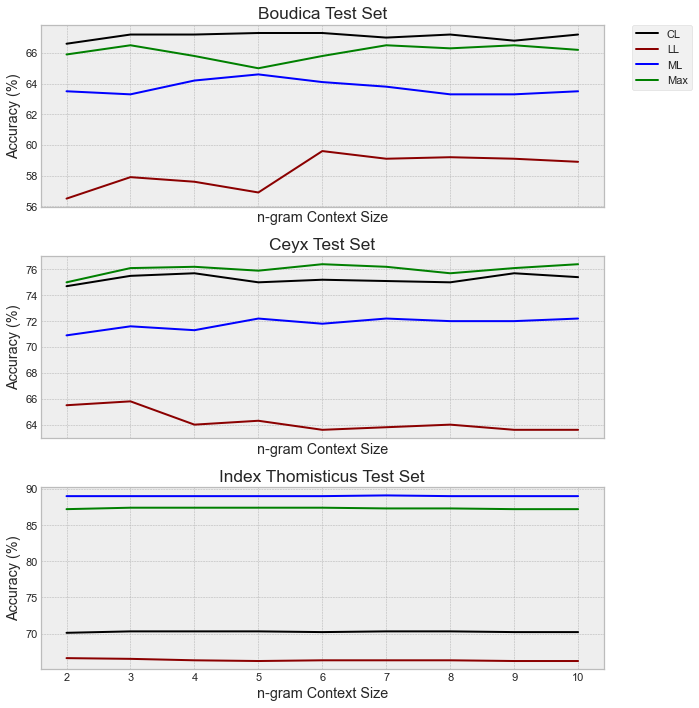

In [176]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.rcParams["font.family"] = "Arial"

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10), sharex=True)

y_label = [2,3,4,5,6,7,8,9,10]

ax1.plot(y_label, Boudica_acc[0:9], "black")
ax1.plot(y_label, Boudica_acc[9:18], "darkred") 
ax1.plot(y_label, Boudica_acc[18:27], "blue")
ax1.plot(y_label, Boudica_acc[27:], "green")
ax1.set_ylabel("Accuracy (%)")
ax1.legend(["CL", "LL", "ML", "Max"],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.set_title("Boudica Test Set")
ax1.set_xlabel("n-gram Context Size")

ax2.plot(y_label, Ceyx_acc[0:9], "black")
ax2.plot(y_label, Ceyx_acc[9:18], "darkred")
ax2.plot(y_label, Ceyx_acc[18:27], "blue")
ax2.plot(y_label, Ceyx_acc[27:], "green")
ax2.set_ylabel("Accuracy (%)")
ax2.set_title("Ceyx Test Set")
ax2.set_xlabel("n-gram Context Size")

ax3.plot(y_label, IT_acc[0:9], "black")
ax3.plot(y_label, IT_acc[9:18], "darkred")
ax3.plot(y_label, IT_acc[18:27], "blue")
ax3.plot(y_label, IT_acc[27:], "green")
ax3.set_ylabel("Accuracy (%)")
ax3.set_title("Index Thomisticus Test Set")
ax3.set_xlabel("n-gram Context Size")

fig.tight_layout()

plt.savefig("DHTP01.pdf")
plt.show()